In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.linear_model import LogisticRegression

%matplotlib inline


In [5]:
df = pd.read_csv("./houses_unemployed_new.csv")
# df_new= pd.read_csv("houses_unemployed_new.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434357 entries, 0 to 434356
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   city                  434357 non-null  object 
 1   neighborhoods         434357 non-null  object 
 2   date                  434357 non-null  object 
 3   address               434357 non-null  object 
 4   helka                 434357 non-null  object 
 5   kind                  434357 non-null  object 
 6   rooms                 434357 non-null  float64
 7   floor                 434357 non-null  int64  
 8   size                  434357 non-null  float64
 9   price                 434357 non-null  int64  
 10  day                   434357 non-null  int64  
 11  month                 434357 non-null  int64  
 12  year                  434357 non-null  int64  
 13  street                434357 non-null  object 
 14  number                434357 non-null  int64  
 15  

In [ ]:
df= df[df['city'].str.contains("תל אביב")]
df.sort_values(by=['year','price'], ascending=True, inplace=True)
# df.sort_values(by='price', ascending=True, inplace=True)

df

In [ ]:
import seaborn as sns
df.corr()
fig, ax = plt.subplots(figsize=(12, 6)) 
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df.corr(), mask= mask, ax= ax, annot= True)

In [ ]:
df1=pd.get_dummies(df['rooms'], prefix='rooms')
df = pd.concat([df, df1], axis=1)

df1=pd.get_dummies(df['neighborhoods'], prefix='neighborhoods')
df = pd.concat([df, df1], axis=1)


df1=pd.get_dummies(df['kind'], prefix='kind')
df = pd.concat([df, df1], axis=1)

df1 = df._get_numeric_data()
df1.drop(['number','day'],axis="columns", inplace=True)
df1


In [ ]:
y = df1['unemployment_precent']
X = df1.drop(['unemployment_precent'], axis="columns")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [ ]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

In [ ]:
print(f"med: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"r^2: {metrics.r2_score(y_test, y_pred)}")

In [ ]:
train = pd.DataFrame()
valid = pd.DataFrame()
train['Close'] = y_train
valid['Close'] = y_test
valid['Prediction'] = y_pred
#Visualization
plt.figure(figsize=(16,8))
plt.title('Model Results')
plt.xlabel('Unemployment')
plt.ylabel('House price')
# plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Val', 'Prediction'], loc = 'lower right')

In [ ]:
plt.figure(figsize=(20,10))
df1.plot(x='year', y='unemployment_precent', style='o')

In [ ]:
df1['price'].corr(df1['unemployment_precent'])


In [ ]:
arr1 = list(y_pred)
arr2 = list(y_test)
for i in range(20):
    print(f"{i}: {arr1[i]} ======= {arr2[i]} ======= {abs(arr1[i]-arr2[i])/arr2[i]}")

In [ ]:
# dataset=pd.DataFrame(data=df,columns=df.columns)
 
# # to find the correlation, use corr() method on the dataset
# corr=dataset.corr()
 
# plt.xticks(range(len(df.columns)),df.columns,rotation=90)
# plt.yticks(range(len(df.columns)),df.columns)
# plt.imshow(corr, cmap='Blues_r',interpolation="nearest")


In [ ]:
plt.figure(figsize=(20,10))
dfcopy=df[df['kind_דירה בבית קומות']==True]
dfcopy.plot(x='unemployment_precent', y='prime', xlabel='Uneployment Precent', ylabel='House Prices', title='House prices vs. Unemployment Precent', style='o', figsize=(20,10))
# plt.ylim(0, 1000000)


In [ ]:
dfcopy[dfcopy['price']>9000000]

In [ ]:
g = sns.catplot(
    x='unemployment_precent', 
    data=df,
    kind='count', 
    hue='prime',
    palette=["cyan", "lightcoral"], 
    height=5, 
    aspect=1,
    legend=False,
    ).set_axis_labels('unemployment_precent', 'prime')
g.ax.legend(labels=['NON LEGENDARY','LEGENDARY'])

In [ ]:
ax = sns.kdeplot(df['unemployment_precent'], shade=True)
sns.kdeplot(df['prime'], shade=True)

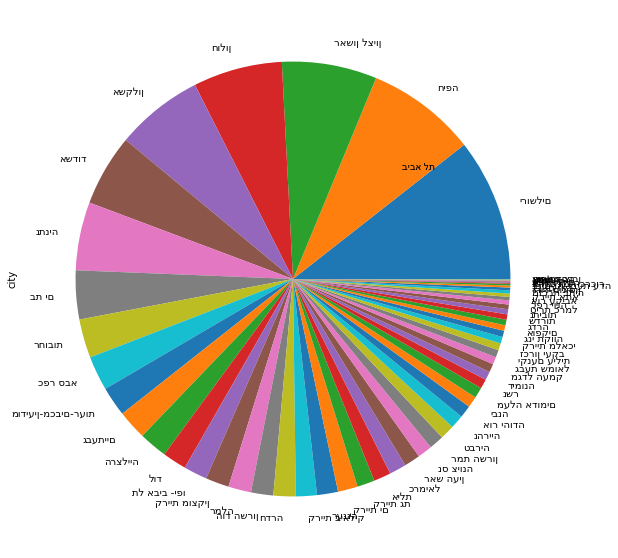

In [8]:
from bidi import algorithm as bidialg

df["city"].value_counts().plot(kind='pie', figsize=(20,10))
text = bidialg.get_display('תל אביב')
plt.text(0.5, 0.5, text , name = 'Arial')
plt.show()